---
## Interactive distributions

Adjust the sliders to change the mean (μ) and standard deviation (σ) of the distribution.

The mean moves the distribution so that its mean is higher or lower

The standard deviation changes the spread, changing the uncertainty of the belief

Play with the distributions.

---

Use the sliders to generate distributions that represent different prior beliefs for theta:

  - Certain belief that the theta is high

  - Certain belief that the theta is low 
  
  - Uncertain belief that the theta is high   
  
  - Uncertain belief that the theta is low

Click on code cell and press play to run

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from scipy.stats import norm

def plot_gaussian(mu=0.0, sigma=1.0):
    # Fixed x range
    x = np.linspace(-20, 20, 1000)
    y = norm.pdf(x, mu, sigma)

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y, label=f'N({mu:.2f}, {sigma:.2f}²)', color='purple')
    ax.fill_between(x, y, color='plum', alpha=0.4)
    ax.set_title("Gaussian Distribution")
    ax.set_xlabel("θ")
    ax.set_ylabel("Probability Density")
    ax.set_xlim(-20, 20)
    ax.set_ylim(0, 3)
    ax.grid(True)
    ax.legend()
    plt.show()

interact(
    plot_gaussian,
    mu=widgets.FloatSlider(min=-10, max=10, step=0.1, value=0.0, description="μ"),
    sigma=widgets.FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description="σ")
);

interactive(children=(FloatSlider(value=0.0, description='μ', max=10.0, min=-10.0), FloatSlider(value=1.0, des…

---
## Interpreting probability distributions

There are intuitive ways to read off probabilities from probability distributions like these.

According to the belief encoded by the distribution, the probability of theta being larger than say 0.5 or 5 is the area under the curve above this value

Similarly, the probability of theta being between say 0.1 and 0.7 is the area under the curve between these two values

Play with the sliders to see how the area under the curve changes as you change the minimum and maximum values.

The shaded area represents the probability of theta being in the range you selected.

Again, click on the code cell and press play to run code.

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from scipy.stats import norm

def plot_gaussian(mu=0.0, sigma=1.0, x_min=-1.0, x_max=1.0):
    # Fixed x range
    x = np.linspace(-20, 20, 1000)
    y = norm.pdf(x, mu, sigma)

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y, label=f'N({mu:.2f}, {sigma:.2f}²)', color='purple')

    # Fill full curve lightly
    ax.fill_between(x, y, color='plum', alpha=0.2)

    # Highlight area between x_min and x_max
    mask = (x >= x_min) & (x <= x_max)
    ax.fill_between(x[mask], y[mask], color='mediumvioletred', alpha=0.6,
                    label=f"P({x_min:.2f} < θ < {x_max:.2f}) ≈ {norm.cdf(x_max, mu, sigma) - norm.cdf(x_min, mu, sigma):.2f}")

    ax.set_title("Probability as Area Under the Curve")
    ax.set_xlabel("θ")
    ax.set_ylabel("Probability Density")
    ax.set_xlim(-20, 20)
    ax.set_ylim(0, max(y) * 1.1)
    ax.grid(True)
    ax.legend()
    plt.show()

interact(
    plot_gaussian,
    mu=widgets.FloatSlider(min=-10, max=10, step=0.1, value=0.0, description="μ"),
    sigma=widgets.FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description="σ"),
    x_min=widgets.FloatSlider(min=-10, max=10, step=0.1, value=-1.0, description="x min"),
    x_max=widgets.FloatSlider(min=-10, max=10, step=0.1, value=1.0, description="x max")
)


interactive(children=(FloatSlider(value=0.0, description='μ', max=10.0, min=-10.0), FloatSlider(value=1.0, des…

<function __main__.plot_gaussian(mu=0.0, sigma=1.0, x_min=-1.0, x_max=1.0)>

---
## Bayesian credibility intervals

A Bayesian credibility interval is a range of values that contains the true value of the parameter with a certain probability. 

It is similar to a confidence interval in frequentist statistics, but it is based on the posterior distribution of the parameter rather than the sampling distribution.

Its interpretation is actually what most people think of when they hear the term "confidence interval". Its what they are looking for when they ask for a confidence interval.

You can construct a Bayesian credibility interval by picking the probability you want to contain the true value of the parameter, and then finding the range of values that contains that probability. 

Play with the sliders to see how the credibility interval changes as you change the probability.

The most typical is the 95% credibility interval $BCI_{95}$, which contains the value of the parameter with 95% probability.  

The 50% credibility interval $BCI_{50}$ would contains the value of the parameter with 50% probability. And so on.

---

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from scipy.stats import norm

def plot_gaussian_bci(mu=0.0, sigma=1.0, bci=95.0):
    # Fixed x and y ranges
    x = np.linspace(-10, 10, 1000)
    y = norm.pdf(x, mu, sigma)

    # Compute credible interval bounds
    alpha = 1 - bci / 100
    lower_bound = norm.ppf(alpha / 2, mu, sigma)
    upper_bound = norm.ppf(1 - alpha / 2, mu, sigma)
    y_bound = norm.pdf([lower_bound, upper_bound], mu, sigma).min()

    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot curve and shading
    ax.plot(x, y, label=f'N({mu:.2f}, {sigma:.2f}²)', color='purple')
    ax.fill_between(x, y, color='plum', alpha=0.2)

    # Highlight credible interval
    mask = (x >= lower_bound) & (x <= upper_bound)
    ax.fill_between(x[mask], y[mask], color='mediumvioletred', alpha=0.6,
                    label=f"{bci:.0f}% BCI: [{lower_bound:.2f}, {upper_bound:.2f}]")

    # Dashed lines at interval bounds
    ax.hlines(y=y_bound, xmin=lower_bound, xmax=upper_bound,
              color='black', linestyle='--', linewidth=1)
    ax.vlines([lower_bound, upper_bound], ymin=0, ymax=y_bound,
              color='black', linestyle='--', linewidth=1)

    # Fixed axes
    ax.set_xlim(-10, 10)
    ax.set_ylim(0, 0.5)  # Fixed y-range to accommodate all practical normal densities

    # Labels and legend
    ax.set_title("Central Bayesian Credible Interval (BCI)", fontsize=14)
    ax.set_xlabel("θ")
    ax.set_ylabel("Probability Density")
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(loc="upper left")
    plt.show()

# Interactive sliders
interact(
    plot_gaussian_bci,
    mu=widgets.FloatSlider(min=-5, max=5, step=0.1, value=0.0, description="μ"),
    sigma=widgets.FloatSlider(min=0.1, max=3.0, step=0.1, value=1.0, description="σ"),
    bci=widgets.FloatSlider(min=50, max=99, step=1, value=95, description="BCI (%)")
)


interactive(children=(FloatSlider(value=0.0, description='μ', max=5.0, min=-5.0), FloatSlider(value=1.0, descr…

<function __main__.plot_gaussian_bci(mu=0.0, sigma=1.0, bci=95.0)>

---
## Prior beliefs for theta

We need to think carefully about what theta means

Theta represents cognitive ability in our go-no-go task

0 is the worst possible cognitive ability, and 1 is the best.

So we should set a prior distribution for theta between 0 and 1.

The distributions above do not do this, so let's fix this. 

We can use a beta distribution to represent our prior belief about theta.

The beta distribution is a continuous probability distribution defined on the interval [0, 1], so it is perfect for our needs.

---
## Try it out
 
Play around with beta distribution parameters to see how the shape of the distribution changes:

You are complete uncertain about the ability
  → Set the widest prior

You are quite certain that ability will be high  
  → Set a narrow prior centered on a high value

You are quite certain that ability will be low  
  → Set a narrow prior centered on a low value
  
You are uncertain but you think ability is low  
  → Set a wide prior centered on a low value

---

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import ipywidgets as widgets
from IPython.display import display, clear_output

# Sliders
n_slider = widgets.IntSlider(value=10, min=1, max=100, step=1, description="n")
k_slider = widgets.IntSlider(value=5, min=0, max=100, step=1, description="k")

# Output area
plot_output = widgets.Output()

# Plot function
def plot_beta(k, n):
    x = np.linspace(0, 1, 500)
    a = k + 1
    b = (n - k) + 1
    y = beta.pdf(x, a, b)

    with plot_output:
        clear_output(wait=True)
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.plot(x, y, label=f"Beta({a}, {b})", color='blue')
        ax.fill_between(x, y, color='skyblue', alpha=0.3)
        ax.set_title("Beta Distribution for θ")
        ax.set_xlabel("θ")
        ax.set_ylabel("Probability Density")
        ax.grid(True)
        ax.legend()
        plt.show()

# Unified update function
def on_slider_change(change=None):
    # Avoid recursive triggers by updating value only if needed
    if k_slider.value > n_slider.value:
        k_slider.unobserve(on_slider_change, names='value')
        k_slider.value = n_slider.value
        k_slider.observe(on_slider_change, names='value')
    plot_beta(k_slider.value, n_slider.value)

# Set up observers (after defining callback)
n_slider.observe(on_slider_change, names='value')
k_slider.observe(on_slider_change, names='value')

# Layout and display
display(widgets.VBox([n_slider, k_slider]), plot_output)

# Initial plot
plot_beta(k_slider.value, n_slider.value)


Output()

---

## Prior × Likelihood => Posterior

We’ve learned that the posterior is **proportional** to the prior times the likelihood:

$$
\text{Posterior} \propto \text{Prior} \times \text{Likelihood}
$$

Now you can explore this directly:

Use the **sliders** to define a prior distribution and a likelihood.

The resulting product is shown as the **posterior**.

By default, this is **not normalized** — you are just seeing the raw shape.

This shape still carries meaning: it shows which values of \( \theta \) are most consistent with both your prior beliefs and the observed data.

---
## Try it

Set a prior and likelihood.

Pick a few values of theta, and multiply the prior by the likelihood.

See if the height of the posterior curve matches your expectation.

---
## What the likelihood is doing

The likelihood tells us **how well each value of theta** predicted the data:

If a value of theta predicts the data well → the posterior belief increases.

If it predicts the data poorly → the posterior belief decreases.

So the posterior reshapes your belief, using the likelihood as a **reweighting function** over your prior.

---
## Normalising the Posterior

You can press the button to **normalize** the posterior.

To turn the posterior into a **true probability distribution**, we need to divide by the **marginal likelihood** — the constant that ensures the posterior integrates to 1:

$$
p(\theta \mid \text{data}) = \frac{p(\theta) \cdot p(\text{data} \mid \theta)}{p(\text{data})}
$$

This is what happens when you check the **“Normalize Posterior”** box in the widget.

It now uses:

$$
p(\theta \mid \text{data}) = \frac{p(\theta) \cdot p(\text{data} \mid \theta)}{\int p(\theta) \cdot p(\text{data} \mid \theta) \, d\theta}
$$

This ensures the area under the posterior curve is 1, just like any valid probability distribution.

---
## Summary Intuition

**Prior** encodes what you believe before data.

**Likelihood** encodes how well each \( \theta \) predicted the data.

**Posterior** is the product: beliefs updated by evidence.

**Normalization** makes it a proper probability distribution.

---
## Try it yourself

Try increasing the amount of data. 

What happens to the posterior width?

Try matching the prior and likelihood peaks. 

What happens to the posterior shape?

---

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import ipywidgets as widgets
from IPython.display import display

x = np.linspace(0, 1, 1000)

# --- Plotting function ---
def plot_bayes(k_prior, n_prior, k_like, n_like, show_norm_post):
    # Prior
    a_prior = k_prior + 1
    b_prior = (n_prior - k_prior) + 1
    y_prior = beta.pdf(x, a_prior, b_prior)

    # Likelihood (visual only)
    a_like = k_like + 1
    b_like = (n_like - k_like) + 1
    y_like = beta.pdf(x, a_like, b_like)

    # Unnormalized Posterior
    y_post = y_prior * y_like

    # Normalize if requested
    if show_norm_post:
        norm_const = np.trapz(y_post, x)
        y_post = y_post / norm_const if norm_const > 0 else np.zeros_like(x)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y_prior, label="Prior", color="blue")
    ax.plot(x, y_like, label="Likelihood", color="red")
    ax.plot(x, y_post, label="Posterior", color="green")

    ax.set_title("Bayesian Updating")
    ax.set_xlabel("θ")
    ax.set_ylabel("Probability Density")
    ax.grid(True)
    ax.legend()
    plt.show()

# --- Sliders ---
k_prior_slider = widgets.IntSlider(min=0, max=100, step=1, value=1, description="k_prior")
n_prior_slider = widgets.IntSlider(min=0, max=100, step=1, value=2, description="n_prior")

k_like_slider = widgets.IntSlider(min=0, max=100, step=1, value=1, description="k_like")
n_like_slider = widgets.IntSlider(min=0, max=100, step=1, value=2, description="n_like")

# --- Checkbox to toggle normalization
show_norm_post = widgets.Checkbox(value=False, description="Normalize Posterior", indent=False)

# --- Ensure k ≤ n ---
def update_k_max(slider_k, slider_n):
    slider_k.max = slider_n.value
    if slider_k.value > slider_k.max:
        slider_k.value = slider_k.max

def update_k_max_prior(*args):
    update_k_max(k_prior_slider, n_prior_slider)

def update_k_max_like(*args):
    update_k_max(k_like_slider, n_like_slider)

n_prior_slider.observe(update_k_max_prior, names='value')
n_like_slider.observe(update_k_max_like, names='value')
update_k_max_prior()
update_k_max_like()

# --- UI layout ---
ui = widgets.VBox([
    widgets.HTML("<b style='color:blue'>Prior sliders</b>"),
    widgets.HBox([n_prior_slider, k_prior_slider]),
    widgets.HTML("<b style='color:red'>Likelihood sliders</b>"),
    widgets.HBox([n_like_slider, k_like_slider]),
    show_norm_post
])

# --- Plot binding
out = widgets.interactive_output(plot_bayes, {
    'k_prior': k_prior_slider,
    'n_prior': n_prior_slider,
    'k_like': k_like_slider,
    'n_like': n_like_slider,
    'show_norm_post': show_norm_post
})

display(ui, out)


Output()

---
## Nuanced Point About the Likelihood

Does the likelihood integrate to 1? In other words, is it a proper probability distribution?

Not the way we plot it.

The likelihood is $p(\mathrm{data} \mid \theta)$: a **probability distribution over the data**, given a fixed value of $\theta$. It is **not** a probability distribution over $\theta$.

So when we plot $\theta \mapsto p(\mathrm{data} \mid \theta)$, we are **not** plotting a probability density function — we're plotting a **likelihood function**, and it does **not** need to integrate to 1 over $\theta$.

However, for each fixed $\theta$, the function **is** a proper probability distribution over data, and it satisfies:

$$
\int p(\mathrm{data} \mid \theta) \, d\,\mathrm{data} = 1
$$

So yes — the likelihood **does** integrate to 1, but **only over the data**, not over $\theta$.

---

## Try it yourself

Wiggle the sliders to get different likelihoods. On the left, when you plot the likelihood, over different values of theta, you can see that the likelihood does not integrate to 1.

However on the right, when you plot the likelihood over different values of data, you can see that the likelihood does integrate to 1.

---


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import ipywidgets as widgets
from IPython.display import display

# --- Plotting function ---
def plot_likelihood_views(n, k, theta_fixed):
    theta_vals = np.linspace(0, 1, 500)
    likelihood_theta = binom.pmf(k, n, theta_vals)
    area_theta = np.trapz(likelihood_theta, theta_vals)

    k_vals = np.arange(0, n + 1)
    likelihood_data = binom.pmf(k_vals, n, theta_fixed)
    area_data = np.sum(likelihood_data)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Left: likelihood as function of θ
    axes[0].plot(theta_vals, likelihood_theta, color='black', lw=2)
    axes[0].set_title(rf"$\theta \mapsto p(k={k} \mid \theta, n={n})$")
    axes[0].set_xlabel("θ")
    axes[0].set_ylabel(r"$p(k \mid \theta, n)$")
    axes[0].grid(True, linestyle='--', alpha=0.5)
    axes[0].set_ylim(0, 1)
    axes[0].text(0.95, 0.95, f"∫ dθ ≈ {area_theta:.3f}", transform=axes[0].transAxes,
                 ha='right', va='top', fontsize=10, bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray'))

    # Right: likelihood as function of data (k)
    axes[1].bar(k_vals, likelihood_data, color='black', alpha=0.8)
    axes[1].set_title(rf"$k \mapsto p(k \mid \theta={theta_fixed:.2f}, n={n})$")
    axes[1].set_xlabel("k (number of successes)")
    axes[1].set_ylabel("Probability")
    axes[1].grid(True, linestyle='--', alpha=0.5)
    axes[1].set_ylim(0, 1)
    axes[1].text(0.95, 0.95, f"∑ = {area_data:.3f}", transform=axes[1].transAxes,
                 ha='right', va='top', fontsize=10, bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray'))

    plt.tight_layout()
    plt.show()

# --- Sliders ---
n_slider = widgets.IntSlider(min=1, max=50, value=10, step=1, description="n (trials)")
k_slider = widgets.IntSlider(min=0, max=50, value=5, step=1, description="k (successes)")
theta_slider = widgets.FloatSlider(min=0.01, max=0.99, value=0.5, step=0.01, description="θ (fixed)")

# --- Enforce k ≤ n ---
def update_k_max(*args):
    k_slider.max = n_slider.value
    if k_slider.value > k_slider.max:
        k_slider.value = k_slider.max

n_slider.observe(update_k_max, names='value')
update_k_max()

# --- Layout ---
ui = widgets.VBox([
    widgets.HTML("<b>Comparing Likelihood Functions</b>"),
    widgets.HTML("Left: Likelihood as a function of θ (not normalized)"),
    widgets.HTML("Right: Likelihood as a function of data k (normalized to 1)"),
    widgets.HBox([n_slider, k_slider, theta_slider])
])

out = widgets.interactive_output(plot_likelihood_views, {
    'n': n_slider,
    'k': k_slider,
    'theta_fixed': theta_slider
})

display(ui, out)


Output()

--- 
## Bayesian credibility intervals and Maximum a posteriori estimates

Now we have a proper normalised posterior, we may want to summarise it with credible intervals.

These are the Bayesian equivalent of confidence intervals. But better, obvs. 

Play with the slider that finds the Xth percentile credible interval. 

What happens to the interval when you drop the percentile lower?

---

## MAP

Plot the MAP - Maximum a posteriori.

What is it? 

How would you define it?

---

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.special import betaln
import ipywidgets as widgets
from IPython.display import display

x = np.linspace(0, 1, 1000)

def plot_bayes(k_prior, n_prior, k_like, n_like, ci_width, show_shading, show_mean, show_map, show_curves):
    # Prior parameters
    a_prior = k_prior + 1
    b_prior = (n_prior - k_prior) + 1
    y_prior = beta.pdf(x, a_prior, b_prior)

    # Likelihood as Beta PDF (for visualization only)
    a_like = k_like + 1
    b_like = (n_like - k_like) + 1
    y_like = beta.pdf(x, a_like, b_like)

    # Posterior parameters (from conjugate Beta-Binomial update)
    a_post = a_prior + k_like
    b_post = b_prior + n_like - k_like
    y_post = beta.pdf(x, a_post, b_post)

    # Compute proper marginal likelihood
    log_ml = betaln(k_like + a_prior, n_like - k_like + b_prior) - betaln(a_prior, b_prior)
    marginal_likelihood = np.exp(log_ml)

    # Compute Bayesian credible interval (BCI)
    lower = beta.ppf((1 - ci_width / 100) / 2, a_post, b_post)
    upper = beta.ppf(1 - (1 - ci_width / 100) / 2, a_post, b_post)

    # Posterior Mean and MAP
    posterior_mean = a_post / (a_post + b_post)
    map_index = np.argmax(y_post)
    posterior_map = x[map_index]

    # Plotting
    fig, ax = plt.subplots(figsize=(8, 6))
    
    if show_curves:
        ax.plot(x, y_prior, label="Prior", color="blue")
        ax.plot(x, y_like, label="Likelihood (visualized)", color="red")

    ml_text = f"Posterior (marginal likelihood ≈ {marginal_likelihood:.3f})"
    ax.plot(x, y_post, label=ml_text, color="green")

    if show_shading:
        ax.fill_between(x, y_post, where=(x >= lower) & (x <= upper), color='gray', alpha=0.3, label=f"{ci_width}% BCI")
    else:
        ax.axvline(lower, color='gray', linestyle='--', label=f"{ci_width}% BCI")
        ax.axvline(upper, color='gray', linestyle='--')

    if show_mean:
        ax.axvline(posterior_mean, color='black', linestyle=':', label="Posterior Mean")

    if show_map:
        ax.axvline(posterior_map, color='purple', linestyle='-.', label="Posterior MAP")

    ax.set_title("Bayesian Updating with BCI, Mean, and MAP")
    ax.set_xlabel("θ")
    ax.set_ylabel("Probability Density")
    ax.grid(True)
    ax.legend()
    plt.show()

# Sliders
k_prior_slider = widgets.IntSlider(min=0, max=100, step=1, value=1, description="k_prior", style={'description_width': 'initial'})
n_prior_slider = widgets.IntSlider(min=0, max=100, step=1, value=2, description="n_prior", style={'description_width': 'initial'})

k_like_slider = widgets.IntSlider(min=0, max=100, step=1, value=1, description="k_like", style={'description_width': 'initial'})
n_like_slider = widgets.IntSlider(min=0, max=100, step=1, value=2, description="n_like", style={'description_width': 'initial'})

ci_slider = widgets.IntSlider(min=50, max=99, step=1, value=95, description="BCI (%)", style={'description_width': 'initial'})

# Toggles
shading_toggle = widgets.Checkbox(value=True, description='Shade BCI')
mean_toggle = widgets.Checkbox(value=True, description='Show Posterior Mean')
map_toggle = widgets.Checkbox(value=True, description='Show MAP')
curves_toggle = widgets.Checkbox(value=True, description='Show Prior & Likelihood')

# Reusable fix for k ≤ n
def enforce_k_leq_n(k_slider, n_slider):
    k_slider.max = n_slider.value
    if k_slider.value > k_slider.max:
        k_slider.value = k_slider.max

# Observers
def update_k_max_prior(*args):
    enforce_k_leq_n(k_prior_slider, n_prior_slider)

def update_k_max_like(*args):
    enforce_k_leq_n(k_like_slider, n_like_slider)

n_prior_slider.observe(update_k_max_prior, names='value')
n_like_slider.observe(update_k_max_like, names='value')

# Initial sync
update_k_max_prior()
update_k_max_like()

# Layout
ui = widgets.VBox([
    widgets.HTML("<b style='color:blue'>Prior sliders</b>"),
    widgets.HBox([n_prior_slider, k_prior_slider]),
    widgets.HTML("<b style='color:red'>Likelihood sliders</b>"),
    widgets.HBox([n_like_slider, k_like_slider]),
    widgets.HTML("<b>Posterior Display Options</b>"),
    ci_slider,
    shading_toggle,
    mean_toggle,
    map_toggle,
    curves_toggle
])

out = widgets.interactive_output(plot_bayes, {
    'k_prior': k_prior_slider,
    'n_prior': n_prior_slider,
    'k_like': k_like_slider,
    'n_like': n_like_slider,
    'ci_width': ci_slider,
    'show_shading': shading_toggle,
    'show_mean': mean_toggle,
    'show_map': map_toggle,
    'show_curves': curves_toggle
})

display(ui, out)


Output()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.special import betaln
import ipywidgets as widgets
from IPython.display import display

x = np.linspace(0, 1, 1000)

# --- Plotting function ---
def plot_bayes(k_prior, n_prior, k_like, n_like, ci_width, show_shading, show_mean, show_map, show_curves):
    # Prior parameters
    a_prior = k_prior + 1
    b_prior = (n_prior - k_prior) + 1
    y_prior = beta.pdf(x, a_prior, b_prior)

    # Likelihood as Beta PDF (for visualization only)
    a_like = k_like + 1
    b_like = (n_like - k_like) + 1
    y_like = beta.pdf(x, a_like, b_like)

    # Posterior parameters (from conjugate Beta-Binomial update)
    a_post = a_prior + k_like
    b_post = b_prior + n_like - k_like
    y_post = beta.pdf(x, a_post, b_post)

    # Compute proper marginal likelihood
    log_ml = betaln(k_like + a_prior, n_like - k_like + b_prior) - betaln(a_prior, b_prior)
    marginal_likelihood = np.exp(log_ml)

    # Compute Bayesian credible interval (BCI)
    lower = beta.ppf((1 - ci_width / 100) / 2, a_post, b_post)
    upper = beta.ppf(1 - (1 - ci_width / 100) / 2, a_post, b_post)

    # Posterior Mean and MAP
    posterior_mean = a_post / (a_post + b_post)
    map_index = np.argmax(y_post)
    posterior_map = x[map_index]

    # Plotting
    fig, ax = plt.subplots(figsize=(8, 6))
    
    if show_curves:
        ax.plot(x, y_prior, label="Prior", color="blue")
        ax.plot(x, y_like, label="Likelihood (visualized)", color="red")

    ml_text = f"Posterior (marginal likelihood ≈ {marginal_likelihood:.3f})"
    ax.plot(x, y_post, label=ml_text, color="green")

    if show_shading:
        ax.fill_between(x, y_post, where=(x >= lower) & (x <= upper), color='gray', alpha=0.3, label=f"{ci_width}% BCI")
    else:
        ax.axvline(lower, color='gray', linestyle='--', label=f"{ci_width}% BCI")
        ax.axvline(upper, color='gray', linestyle='--')

    if show_mean:
        ax.axvline(posterior_mean, color='black', linestyle=':', label="Posterior Mean")

    if show_map:
        ax.axvline(posterior_map, color='purple', linestyle='-.', label="Posterior MAP")

    ax.set_title("Bayesian Updating with BCI, Mean, and MAP")
    ax.set_xlabel("θ")
    ax.set_ylabel("Probability Density")
    ax.grid(True)
    ax.legend()
    plt.show()

# Sliders
k_prior_slider = widgets.IntSlider(min=0, max=100, step=1, value=1, description="k_prior", style={'description_width': 'initial'})
n_prior_slider = widgets.IntSlider(min=0, max=100, step=1, value=2, description="n_prior", style={'description_width': 'initial'})

k_like_slider = widgets.IntSlider(min=0, max=100, step=1, value=1, description="k_like", style={'description_width': 'initial'})
n_like_slider = widgets.IntSlider(min=0, max=100, step=1, value=2, description="n_like", style={'description_width': 'initial'})

ci_slider = widgets.IntSlider(min=50, max=99, step=1, value=95, description="BCI (%)", style={'description_width': 'initial'})

# Toggles (defaults set to False)
shading_toggle = widgets.Checkbox(value=False, description='Shade BCI')
mean_toggle = widgets.Checkbox(value=False, description='Show Posterior Mean')
map_toggle = widgets.Checkbox(value=False, description='Show MAP')
curves_toggle = widgets.Checkbox(value=False, description='Show Prior & Likelihood')

# Reusable fix for k ≤ n
def enforce_k_leq_n(k_slider, n_slider):
    k_slider.max = n_slider.value
    if k_slider.value > k_slider.max:
        k_slider.value = k_slider.max

# Observers
def update_k_max_prior(*args):
    enforce_k_leq_n(k_prior_slider, n_prior_slider)

def update_k_max_like(*args):
    enforce_k_leq_n(k_like_slider, n_like_slider)

n_prior_slider.observe(update_k_max_prior, names='value')
n_like_slider.observe(update_k_max_like, names='value')

# Initial sync
update_k_max_prior()
update_k_max_like()

# Layout
ui = widgets.VBox([
    widgets.HTML("<b style='color:blue'>Prior sliders</b>"),
    widgets.HBox([n_prior_slider, k_prior_slider]),
    widgets.HTML("<b style='color:red'>Likelihood sliders</b>"),
    widgets.HBox([n_like_slider, k_like_slider]),
    widgets.HTML("<b>Posterior Display Options</b>"),
    ci_slider,
    shading_toggle,
    mean_toggle,
    map_toggle,
    curves_toggle
])

out = widgets.interactive_output(plot_bayes, {
    'k_prior': k_prior_slider,
    'n_prior': n_prior_slider,
    'k_like': k_like_slider,
    'n_like': n_like_slider,
    'ci_width': ci_slider,
    'show_shading': shading_toggle,
    'show_mean': mean_toggle,
    'show_map': map_toggle,
    'show_curves': curves_toggle
})

display(ui, out)


Output()

---
## Compute the posterior analytically

We can start with the very special case of the beta distribution.

The beta distribution allows for a very simple way to compute the posterior just by adding n and k to the inputs to the Beta function.

This is called computing the posterior analytically, and it is a special case of the *conjugate* prior.

This simplicity is, alas, not always possible.

---

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import ipywidgets as widgets
from IPython.display import display, HTML

x = np.linspace(0, 1, 1000)

def plot_special_case(n, k):
    if k > n:
        print("Error: k must be ≤ n.")
        return

    # Prior: Beta(1, 1)
    a_prior, b_prior = 1, 1
    y_prior = beta.pdf(x, a_prior, b_prior)

    # Posterior: Beta(1 + k, 1 + n - k)
    a_post = 1 + k
    b_post = 1 + (n - k)
    y_post = beta.pdf(x, a_post, b_post)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot prior
    ax.plot(x, y_prior, label="Prior: Beta(1, 1)", color="blue")
    ax.fill_between(x, y_prior, color="skyblue", alpha=0.4)

    # Plot posterior
    full_label = f"Posterior: Beta(1 + k, 1 + (n − k)) = Beta({a_post}, {b_post})"
    ax.plot(x, y_post, label=full_label, color="green")
    ax.fill_between(x, y_post, color="lightgreen", alpha=0.4)

    # Adjust layout and axis
    ax.set_title("Bayesian Update for Go/NoGo Data")
    ax.set_xlabel("θ")
    ax.set_ylabel("Probability Density")
    ax.set_ylim(0, max(np.max(y_post), np.max(y_prior)) * 1.2)
    ax.grid(True)

    # Move legend outside to the right
    fig.subplots_adjust(right=0.75)
    ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False)

    plt.show()

# Sliders
n_slider = widgets.IntSlider(min=1, max=100, step=1, value=56, description="n (trials)", style={'description_width': 'initial'})
k_slider = widgets.IntSlider(min=0, max=56, step=1, value=43, description="k (correct)", style={'description_width': 'initial'})

# Auto-adjust k bounds
def update_k_slider(*args):
    k_slider.max = n_slider.value
    if k_slider.value > k_slider.max:
        k_slider.value = k_slider.max

n_slider.observe(update_k_slider, names='value')
update_k_slider()  # Initial sync

# Layout
ui = widgets.VBox([
    widgets.HTML("<b>Beta Posterior: Special case of beta distribution</b>"),
    widgets.HBox([n_slider, k_slider])
])

out = widgets.interactive_output(plot_special_case, {'n': n_slider, 'k': k_slider})

display(ui, out)


Output()

---
## Sequential vs. aggregated updating of the prior   

So now we can think about what happens when the data rolls in. 

Suppose we have a dataset which is 9 out of 10 correct.

Compute the posterior for this dataset by setting k to 9 and n to 10.

Now suppose we then obtain an additional dataset where k = 3 and n = 5. 

So what is the posterior now?

There are two ways to compute the posterior. 

Compute the posterior for the first dataset, and then set that as the prior for the second dataset and compute it again. 

*Today's posterior is tomorrow's prior*

---

## Sequential updating: update in multiple steps  

Recall, the Beta distribution is Beta(1+k, (n-k)+1)

So if you have no data to begib with then n is 0 and k is 0.

So the prior is Beta(1, 1)

Then give it the first dataset (k = 9, n = 10). This gives you a posterior of Beta(10,2).

Now set this posterior as a new prior Beta(10,2) and then update according to the second dataset (k = 3, n = 5).

What is the posterior now?

---

## Aggregated updating: update all in one go

Now lets compute the posterior for the two datasets together.

Set the prior to be Beta(1,1) and set the data to be k = 9 + 3 = 12 and n = 10 + 5 = 15.

Set the uniform prior Beta(1,1) then add the combined dataset (k=12, n=15).

What is the posterior now?

Are they the same or different? 

Is this good?

---

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import ipywidgets as widgets
from IPython.display import display

x = np.linspace(0, 1, 1000)

def plot_update(n_prior, k_prior, n_new, k_new):
    if k_prior > n_prior or k_new > n_new:
        print("Error: k must be ≤ n.")
        return

    # Prior = Beta(1 + k_prior, 1 + n_prior - k_prior)
    a_prior = 1 + k_prior
    b_prior = 1 + (n_prior - k_prior)
    y_prior = beta.pdf(x, a_prior, b_prior)

    # Posterior = Beta(1 + total_k, 1 + total_n - total_k)
    total_k = k_prior + k_new
    total_n = n_prior + n_new
    a_post = 1 + total_k
    b_post = 1 + (total_n - total_k)
    y_post = beta.pdf(x, a_post, b_post)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))

    ax.plot(x, y_prior, label=f"Prior: Beta(1 + {k_prior}, 1 + {n_prior - k_prior})", color="blue")
    ax.fill_between(x, y_prior, color="skyblue", alpha=0.4)

    ax.plot(x, y_post, label=f"Posterior: Beta(1 + {total_k}, 1 + {total_n - total_k})", color="green")
    ax.fill_between(x, y_post, color="lightgreen", alpha=0.4)

    ax.set_title("Bayesian Update: Prior + New Data → Posterior")
    ax.set_xlabel("θ")
    ax.set_ylabel("Probability Density")
    ax.set_ylim(0, max(np.max(y_prior), np.max(y_post)) * 1.2)
    ax.grid(True)

    # Adjust spacing and move legend to right
    fig.subplots_adjust(right=0.75)
    ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False)

    plt.show()

# Sliders
n_prior_slider = widgets.IntSlider(min=0, max=100, step=1, value=20, description="n_prior")
k_prior_slider = widgets.IntSlider(min=0, max=20, step=1, value=10, description="k_prior")

n_new_slider = widgets.IntSlider(min=0, max=100, step=1, value=30, description="n_new")
k_new_slider = widgets.IntSlider(min=0, max=30, step=1, value=15, description="k_new")

# Auto-limit k sliders
def update_k_prior_max(*args):
    k_prior_slider.max = n_prior_slider.value
    if k_prior_slider.value > k_prior_slider.max:
        k_prior_slider.value = k_prior_slider.max

def update_k_new_max(*args):
    k_new_slider.max = n_new_slider.value
    if k_new_slider.value > k_new_slider.max:
        k_new_slider.value = k_new_slider.max

n_prior_slider.observe(update_k_prior_max, names='value')
n_new_slider.observe(update_k_new_max, names='value')

# Initial sync
update_k_prior_max()
update_k_new_max()

# Layout
ui = widgets.VBox([
    widgets.HTML("<b>Sequential Bayesian Update</b>"),
    widgets.HTML("🔵 <b>Prior</b>"),
    widgets.HBox([n_prior_slider, k_prior_slider]),
    widgets.HTML("🟢 <b>New Data</b>"),
    widgets.HBox([n_new_slider, k_new_slider])
])

out = widgets.interactive_output(plot_update, {
    'n_prior': n_prior_slider,
    'k_prior': k_prior_slider,
    'n_new': n_new_slider,
    'k_new': k_new_slider
})

display(ui, out)


Output()

---
## Sampling demo: The magic of Markov Chain Monte Carlo (MCMC)

To illustrate the power of MCMC, we demo with this interactive example.

Play with the data k and n. 

--- 
## Compare sampling to analytical posterior

Compare it to the analytical posterior for the same data.

How do you get the MCMC posterior to better match the analytical posterior?

Click on the show analytic posteror button to overlay the analytical posterior. 

--- 

In [ ]:
import pyjags
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from scipy.stats import beta

# Ensure plots show correctly
%matplotlib inline

def run_jags(k=6, n=10, samples=100, show_analytic=False):
    if k > n:
        print("k must be ≤ n")
        return
    
    y = np.array([1]*k + [0]*(n-k))

    model_code = """
    model {
      for (i in 1:N) {
        y[i] ~ dbern(theta)
      }
      theta ~ dbeta(1, 1)
    }
    """

    data = {"y": y, "N": len(y)}
    inits = [{"theta": 0.5}]
    
    model = pyjags.Model(code=model_code, data=data, init=inits, chains=1)
    model.update(100)  # Burn-in
    result = model.sample(samples, vars=["theta"])
    theta_samples = result["theta"].reshape(-1)

    # Start plotting
    plt.figure(figsize=(7, 4))
    plt.hist(theta_samples, bins=30, density=True, alpha=0.6, label='MCMC posterior')

    # Optionally add analytic posterior
    if show_analytic:
        alpha_post = 1 + k
        beta_post = 1 + (n - k)
        theta_vals = np.linspace(0, 1, 200)
        analytical_posterior = beta.pdf(theta_vals, alpha_post, beta_post)
        plt.plot(theta_vals, analytical_posterior, 'r-', lw=2, label='Analytical posterior')

    plt.title(f"Posterior of θ (k={k}, n={n})")
    plt.xlabel("θ")
    plt.ylabel("Density")
    if show_analytic:
        plt.legend()
    plt.grid(True)
    plt.show()

# Widgets
k_slider = widgets.IntSlider(value=6, min=0, max=20, step=1, description='Successes (k):')
n_slider = widgets.IntSlider(value=10, min=1, max=20, step=1, description='Trials (n):')
sample_slider = widgets.IntSlider(value=100, min=100, max=10000, step=100, description='Samples:')
analytic_toggle = widgets.Checkbox(value=False, description='Show analytic posterior')

# Display widgets and output
ui = widgets.VBox([k_slider, n_slider, sample_slider, analytic_toggle])
out = widgets.interactive_output(run_jags, {
    'k': k_slider,
    'n': n_slider,
    'samples': sample_slider,
    'show_analytic': analytic_toggle
})

display(ui, out)


Output()

--- 
## Visualising the Likelihood Function

For our example, the **binomial distribution** describes the number of successes $k$ in $n$ independent trials, where each trial has a fixed probability of success $\theta$.

It is given by:

$$
p(k \mid \theta, n) = \binom{n}{k} \theta^k (1 - \theta)^{n - k}
$$

This function gives the **likelihood** of observing $k$ successes, given fixed values of $n$ and $\theta$.

--- 
## What does the likelihood represent?

You can think of the binomial likelihood as:

> For a given value of $\theta$ (e.g., a participant's true ability), what is the probability of seeing different possible outcomes $k$?

In this sense, for each fixed $\theta$, the function $p(k \mid \theta, n)$ is a **probability distribution over possible data**.

---
## Why is this important?

Because:

- Even if we know the true $\theta$, we don't always observe the same $k$.
- There is **random variability** in the data due to the finite number of trials.
- So the same $\theta$ could have led to multiple plausible values of $k$.

This is why we say **the data is ambiguous** about the true value of $\theta$ — multiple values of $\theta$ might have plausibly produced the observed $k$.

---
## Intuition

For any fixed $\theta$:

- The binomial likelihood gives you a curve over $k$ (the number of successes).
- It shows what values of $k$ are likely or unlikely if $\theta$ were true.
- The **spread** of this curve reflects how much noise there is in the data.

---
## What happens when you increase $n$?

- The distribution becomes **narrower** — the same $\theta$ now leads to a tighter range of possible $k$.
- This means the data becomes **more informative**.
- So, although the likelihood is still not a distribution over $\theta$, it becomes **more sharply peaked** around the true value as $n$ increases.

This is why **more data means more confident inference**: not because the likelihood becomes a distribution over $\theta$, but because the posterior (which *is* a distribution over $\theta$) becomes more precise.

More data, more certainty. Makes sense, right?

---


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import ipywidgets as widgets
from IPython.display import display, clear_output

def plot_binomial(n=10, theta=0.5):
    clear_output(wait=True)
    k_values = np.arange(0, n+1)
    pmf_values = binom.pmf(k_values, n, theta)

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.stem(
        k_values,
        pmf_values,
        linefmt='gray',
        markerfmt='D',
        basefmt=" ",
    )
    ax.set_title(rf"$k \sim \mathrm{{Binomial}}(n={n},\ \theta={theta})$", fontsize=14)
    ax.set_xlabel("Number of successes (k)")
    ax.set_ylabel(r"$p(k \mid \theta, n)$")
    ax.set_ylim(0, 1)
    ax.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Controls
n_slider = widgets.IntSlider(value=10, min=1, max=500, step=1, description='n (trials)')
theta_slider = widgets.FloatSlider(value=0.5, min=0.01, max=0.99, step=0.01, description='θ (probability)')

# Use interactive_output (not interact)
ui = widgets.VBox([n_slider, theta_slider])
out = widgets.interactive_output(plot_binomial, {'n': n_slider, 'theta': theta_slider})

display(ui, out)


Output()

---

## Visualising the likelihood in terms of the theta

Now we can visualise the binomial distribution in terms of the theta. Thus for a given k that is observed, how likely is each value of theta? 

Which theta is most likely to have produced the observed data?

Play around with k and n to set what the observed data is.

This is the likelihood function that we were using in the examples above to update our prior beliefs about theta.

---

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import ipywidgets as widgets
from IPython.display import display

# Plotting function
def plot_likelihood(n=10, k=5):
    if k > n:
        print("Error: k must be ≤ n.")
        return

    theta_values = np.linspace(0, 1, 500)
    likelihood_values = binom.pmf(k, n, theta_values)

    plt.figure(figsize=(8, 4))
    plt.plot(theta_values, likelihood_values, color='black')
    
    # Title and equation with actual slider values
    plt.title("Plotting likelihood as a function of θ", fontsize=14)
    plt.suptitle(rf"$p(k = {k} \mid \theta, n = {n})$", fontsize=13, y=1.03)

    plt.xlabel(r"$\theta$")
    plt.ylabel(r"$p(k \mid \theta, n)$")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

# Sliders
n_slider = widgets.IntSlider(value=10, min=1, max=50, step=1, description='n (trials)')
k_slider = widgets.IntSlider(value=5, min=0, max=10, step=1, description='k (successes)')

# Keep k ≤ n
def update_k_slider(*args):
    k_slider.max = n_slider.value
    if k_slider.value > k_slider.max:
        k_slider.value = k_slider.max

n_slider.observe(update_k_slider, names='value')
update_k_slider()  # Initial sync

# Interactive display
widgets.interact(plot_likelihood, n=n_slider, k=k_slider)


interactive(children=(IntSlider(value=10, description='n (trials)', max=50, min=1), IntSlider(value=5, descrip…

<function __main__.plot_likelihood(n=10, k=5)>

---
## Using JAGS for MCMC
In this section, we use **pyJAGS** — a Python interface to JAGS (Just Another Gibbs Sampler) — to draw samples from a simple **Bayesian binomial model**.

This allows us to generate samples from the **posterior distribution of $\theta$**, the underlying success probability, given observed data.

---
### How it works:
- The model observes $k$ successes out of $n$ trials.
- We assume a **uniform prior** on $\theta$: $\theta \sim \text{Beta}(1, 1)$.
- JAGS performs Gibbs sampling to approximate the **posterior**:
  $$
  \theta \mid k, n \sim \text{Beta}(1 + k, 1 + n - k)
  $$

---
## Try it:

Use the sliders to:

- Set the number of trials $n$
- Set the number of successes $k$
- Set the number of posterior samples $s$ to draw

Then examine the resulting posterior samples.

---
## Explore:

- **What happens to the posterior as you increase the number of samples $s$?**
  - Does the shape change? What about the smoothness of the histogram?

- **What happens when you increase or decrease $k$?**
  - How does the posterior shift? Why?

- **What happens if you increase $n$ but keep the proportion $k/n$ constant?**
  - Why does the posterior become narrower?
  - What does this tell you about uncertainty?


This interactive model helps build intuition about how Bayesian inference works when estimating an unknown probability.

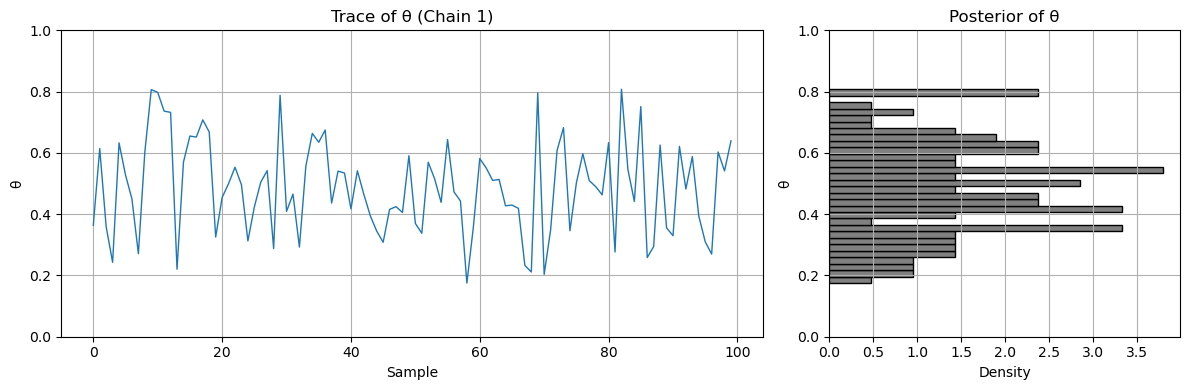

In [30]:
import pyjags
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# JAGS model
model_code = """
model {
  theta ~ dbeta(1,1)
  k_obs ~ dbin(theta, n)
}
"""

# Sliders
n_slider = widgets.IntSlider(value=10, min=1, max=100, step=1, description='n')
k_slider = widgets.IntSlider(value=5, min=0, max=10, step=1, description='k')
s_slider = widgets.IntSlider(value=100, min=100, max=5000, step=100, description='Samples')

# Keep k ≤ n
def update_k_max(*args):
    k_slider.max = n_slider.value
    if k_slider.value > n_slider.value:
        k_slider.value = n_slider.value

n_slider.observe(update_k_max, 'value')

# Run model + plot
def run_model(n, k, s):
    print(f"Running model with n={n}, k={k}, samples={s}")

    data = {'n': n, 'k_obs': k}
    model = pyjags.Model(model_code, data=data, chains=4)
    model.update(1000)
    samples = model.sample(s, vars=['theta'])

    theta = samples['theta']
    chain_1 = theta[0, :, 0]  # only chain 1

    print(f"Chain 1 mean: {np.mean(chain_1):.3f}")
    print(f"Chain 1 std: {np.std(chain_1):.3f}")

    fig, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [2, 1]})

    # Trace plot
    axs[0].plot(chain_1, lw=1)
    axs[0].set_title("Trace of θ (Chain 1)")
    axs[0].set_xlabel("Sample")
    axs[0].set_ylabel("θ")
    axs[0].set_ylim(0, 1)
    axs[0].grid(True)

    # Horizontal histogram (posterior)
    axs[1].hist(chain_1, bins=30, orientation='horizontal', density=True, color='gray', edgecolor='black')
    axs[1].set_title("Posterior of θ")
    axs[1].set_xlabel("Density")
    axs[1].set_ylabel("θ")
    axs[1].set_ylim(0, 1)
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Button
run_button = widgets.Button(description="Run JAGS")

def on_button_clicked(b):
    run_model(n_slider.value, k_slider.value, s_slider.value)

run_button.on_click(on_button_clicked)

# Display
display(widgets.VBox([n_slider, k_slider, s_slider, run_button]))
